In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from redist import modifier
import pilnu_utils

from Bayesian_pyhf import plotting
import arviz as az
import corner

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
null = pilnu_utils.null_pred()
alt = pilnu_utils.alt_pred()

In [4]:
model, alt_yields = modifier.load('pilnu_model.json', alt.distribution, null.distribution, return_data=True)

## Load and plot samples

In [5]:
post_data = az.from_json( 'samples/pilnu_post_data.json')
post_pred = az.from_json( 'samples/pilnu_post_pred.json')
prior_pred = az.from_json('samples/pilnu_prior_pred.json')

In [6]:
post_data.posterior

<xarray.Dataset>
Dimensions:                   (chain: 4, draw: 10000,
                               FF_decorrelated[0]_dim_0: 1,
                               FF_decorrelated[1]_dim_0: 1,
                               FF_decorrelated[2]_dim_0: 1,
                               FF_decorrelated[3]_dim_0: 1,
                               FF_decorrelated[4]_dim_0: 1, mu_dim_0: 1,
                               stat_dim_0: 7, cvl_dim_0: 1, csl_dim_0: 1,
                               ct_dim_0: 1)
Coordinates:
  * chain                     (chain) int64 0 1 2 3
  * draw                      (draw) int64 0 1 2 3 4 ... 9996 9997 9998 9999
  * FF_decorrelated[0]_dim_0  (FF_decorrelated[0]_dim_0) int64 0
  * FF_decorrelated[1]_dim_0  (FF_decorrelated[1]_dim_0) int64 0
  * FF_decorrelated[2]_dim_0  (FF_decorrelated[2]_dim_0) int64 0
  * FF_decorrelated[3]_dim_0  (FF_decorrelated[3]_dim_0) int64 0
  * FF_decorrelated[4]_dim_0  (FF_decorrelated[4]_dim_0) int64 0
  * mu_dim_0                  (mu_dim_0) int64 0
  * stat_dim_0                (stat_dim_0) int64 0 1 2 3 4 5 6
  * cvl_dim_0                 (cvl_dim_0) int64 0
  * csl_dim_0                 (csl_dim_0) int64 0
  * ct_dim_0                  (ct_dim_0) int64 0
Data variables:
    FF_decorrelated[0]        (chain, draw, FF_decorrelated[0]_dim_0) float64 ...
    FF_decorrelated[1]        (chain, draw, FF_decorrelated[1]_dim_0) float64 ...
    FF_decorrelated[2]        (chain, draw, FF_decorrelated[2]_dim_0) float64 ...
    FF_decorrelated[3]        (chain, draw, FF_decorrelated[3]_dim_0) float64 ...
    FF_decorrelated[4]        (chain, draw, FF_decorrelated[4]_dim_0) float64 ...
    mu                        (chain, draw, mu_dim_0) float64 1.0 1.0 ... 1.0
    stat                      (chain, draw, stat_dim_0) float64 1.026 ... 1.01
    cvl                       (chain, draw, cvl_dim_0) float64 0.7268 ... 0.9691
    csl                       (chain, draw, csl_dim_0) float64 0.508 ... 0.5301
    ct                        (chain, draw, ct_dim_0) float64 0.7451 ... 0.498
Attributes:
    created_at:                 2023-11-27T17:35:25.353355
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.10.0
    sampling_time:              6302.489182949066
    tuning_steps:               1500

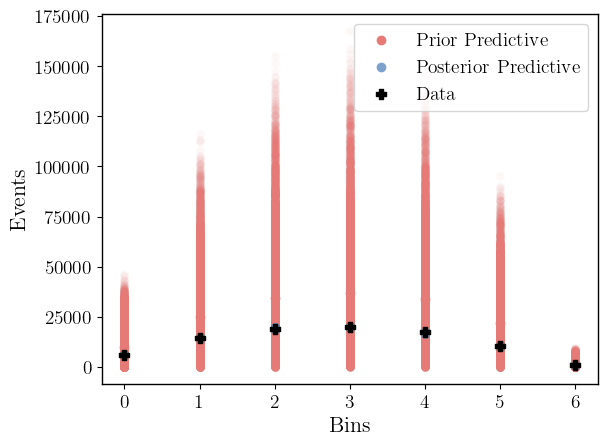

In [7]:
plotting.prior_posterior_predictives(model=model, data=alt_yields, post_pred=post_pred, prior_pred=prior_pred)
plt.show()

array([[<Axes: title={'center': 'csl'}>, <Axes: title={'center': 'csl'}>],
       [<Axes: title={'center': 'FF_decorrelated[2]'}>,
        <Axes: title={'center': 'FF_decorrelated[2]'}>],
       [<Axes: title={'center': 'FF_decorrelated[4]'}>,
        <Axes: title={'center': 'FF_decorrelated[4]'}>],
       [<Axes: title={'center': 'FF_decorrelated[1]'}>,
        <Axes: title={'center': 'FF_decorrelated[1]'}>],
       [<Axes: title={'center': 'ct'}>, <Axes: title={'center': 'ct'}>],
       [<Axes: title={'center': 'FF_decorrelated[0]'}>,
        <Axes: title={'center': 'FF_decorrelated[0]'}>],
       [<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'cvl'}>, <Axes: title={'center': 'cvl'}>],
       [<Axes: title={'center': 'stat'}>,
        <Axes: title={'center': 'stat'}>],
       [<Axes: title={'center': 'FF_decorrelated[3]'}>,
        <Axes: title={'center': 'FF_decorrelated[3]'}>]], dtype=object)

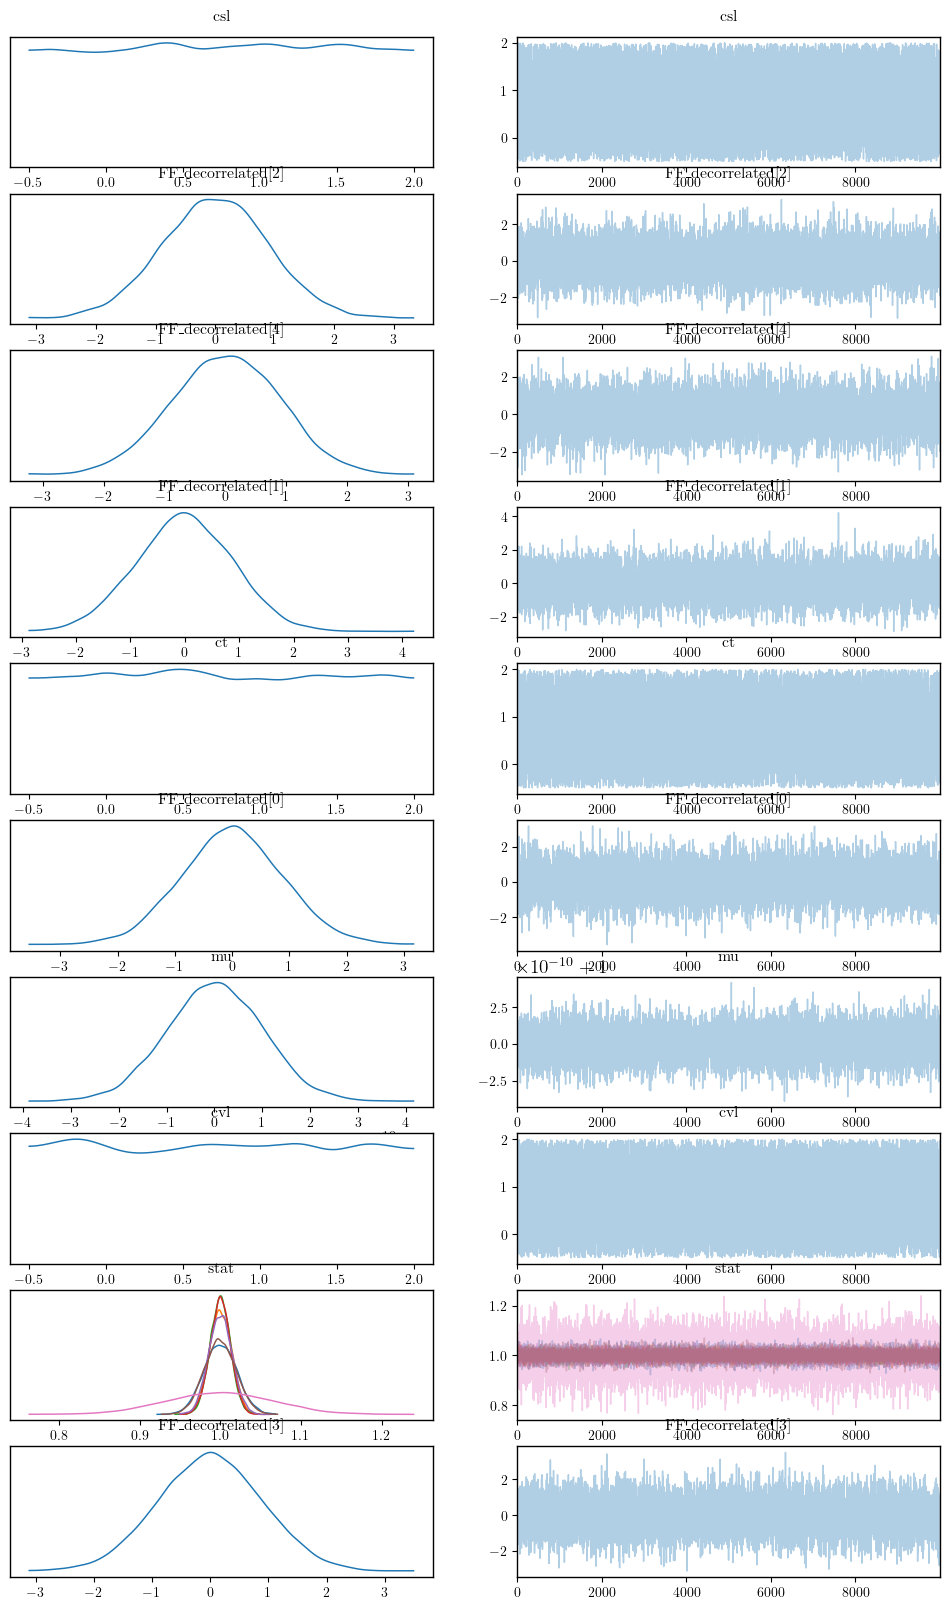

In [8]:
az.plot_trace(prior_pred.prior)

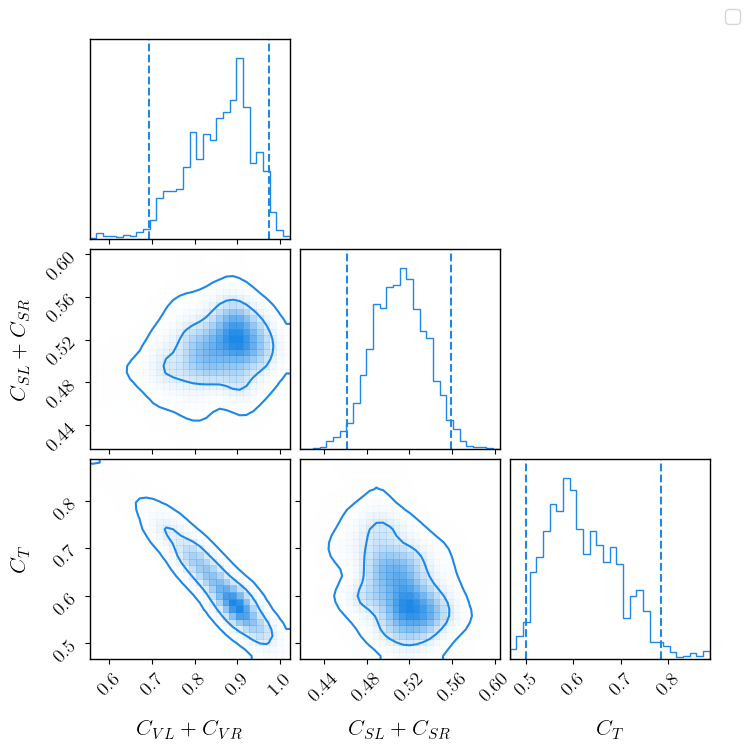

In [13]:
cv = r'$C_{VL} + C_{VR}$'
cs = r'$C_{SL} + C_{SR}$'
ct = r'$C_{T}$'
labels = [cv, cs, ct]

# file = '../results/samples/posterior_corner.pdf'

fig = corner.corner(post_data.posterior, 
                    var_names=['cvl', 'csl', 'ct'],
                    bins=30, 
                    levels=(0.68, 0.95), 
                    quantiles=(0.025, 0.975), 
                    # range = [(0.5,1.5), (0,1), (0,1)],
                    smooth=1.5,
                    labels=labels,
                    color='#1E88E5',
                    plot_datapoints=False
                    );

handles, labs = fig.axes[0].get_legend_handles_labels()
by_label = dict(zip(labs, handles))
fig.legend(by_label.values(), by_label.keys())

# plt.savefig(file)
plt.show()